In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
# Importing the necessary libraries
from utilities.configs import ConFiGS
from render.scene_render import SceneRender
from controller.vehicle_rate_mpc import VehicleRateMPC
import dynamics.flying as fly
import numpy as np

In [ ]:
# Load and List Configs
config = ConFiGS(fout_config="track_hover")

Currently Loaded Configs:
Configs:
 - gaussian_splat    : scene003
 - fout_waypoints    : track_sigmoid
 - mpc_parameters    : flightroom
 - drone_parameters  : carl
 - control_parameters: body_rate_v1
 - flying_parameters : alpha


In [ ]:
# Load the Gaussian Splat
gsplat = SceneRender(config)

[ 0.00000000e+00 -3.00000013e+00 -2.00000008e+00 -1.00000004e+00 -9.28014169e-10  9.93170420e-10 -4.83779535e-11  6.58094134e-11 -3.22719529e-12  7.06825204e-01  7.07388247e-01 -4.06617391e-01  3.67438365e-02 -1.46983009e-01 -1.26097702e-09]
[ 5.00000000e-02 -3.00000741e+00 -1.99997053e+00 -1.00000152e+00 -4.32384352e-04  1.76322852e-03 -8.82548054e-05  3.12445160e-03 -1.90025446e-03  7.06819343e-01  7.07384651e-01 -4.06774188e-01  3.26379147e-02 -1.37264718e-01 -3.21479096e-04]
[[-155.   35.]
 [ -36.  263.]
 [   0.   -3.]]


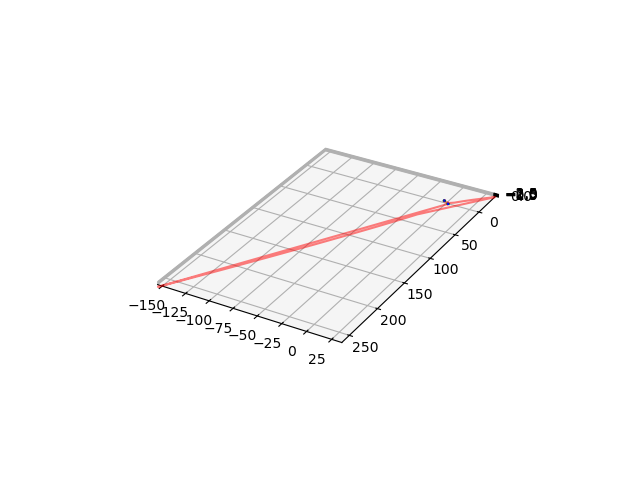

field AcadosOcpDims.N has been migrated to AcadosOcpOptions.N_horizon. setting AcadosOcpOptions.N_horizon = N. For future comppatibility, please use AcadosOcpOptions.N_horizon directly.


In [7]:
# Load the MPC Controller
policy = VehicleRateMPC(config)

In [ ]:
# Load the Simulator
flying = fly.Flying(config)

In [ ]:
t0 = 0.0
tf = 2.0
x0 = np.array([
    -3.0, -2.0, -1.0,
     0.0,  0.0,  0.0,
     0.0, 0.0, 0.707, 0.707
])

Tro,Xro,Uro,Imgs,Tsol,Adv = flying.simulate(policy,gsplat,t0,tf,x0)

In [ ]:
policy.clear_generated_code()
flying.clear_generated_code()